In [1]:
pip install --upgrade gensim --user

In [1]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sklearn in c:\programdata\anaconda3\lib\site-packages (from pyLDAvis) (0.0.post1)



In [6]:
 pip install pyLDAvis.genism

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyLDAvis.genism (from versions: none)
ERROR: No matching distribution found for pyLDAvis.genism


# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk import word_tokenize 
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
import gensim


import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


import collections
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Naman
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [67]:
df1 = pd.read_csv("C:/Users/Naman Kapoor/Downloads/technical-task/work-catergories-data.csv")
df2 = pd.read_csv("C:/Users/Naman Kapoor/Downloads/technical-task/descriptions-data.csv")

In [68]:
df1

WorkCatID                                        WorkCatName
0           0                  Building finishes > Doors > Doors
1           1     Building finishes > Doors > Doors (fire proof)
2           2      Building finishes > External walls > Cladding
3           3     Building finishes > External walls > Rendering
4           4  Building finishes > Flooring > Flooring (cemen...
..        ...                                                ...
91         91  Electrical > Power supply > Emergency lighting...
92         92   Building general > Sector > Listed building work
93         93  Other services > Security > Cctv installation ...
94         94  Mechanical > Boilers > Gas-fired condensing bo...
95         95                      Electrical > Lighting systems

[96 rows x 2 columns]

In [69]:
work_meta = df1['WorkCatName'].to_list()

In [70]:
df1.shape

(96, 2)

In [71]:
df1.describe()

WorkCatID
count  96.000000
mean   47.500000
std    27.856777
min     0.000000
25%    23.750000
50%    47.500000
75%    71.250000
max    95.000000

In [72]:
df1.isnull().sum()

WorkCatID      0
WorkCatName    0
dtype: int64

In [73]:
df2

CompanyID                                        Description  \
0             1  Celebrating 40 years in business! Established ...   
1             2  High Point Construction is a well-established ...   
2             3  West Yorkshire Render & Flooring Ltd are a spe...   
3             4  We are access experts based in Manchester and ...   
4             5  Premier PAT Testing Ltd has established a well...   
...         ...                                                ...   
1803       1804  We are a highly adaptive electrical contractor...   
1804       1805  Horizon Construction Firm has been around for ...   
1805       1806  The Smith family purchased Berkyn Manor Farm &...   
1806       1807  West Scotland Joinery Solutions is a joinery c...   
1807       1808  SEMS LTD is a renowned Electrical contracting ...   

        TargetWorkCatergoryIDs  
0     [61, 62, 63, 70, 89, 91]  
1                         [47]  
2                       [3, 4]  
3                         [25]  
4             [89, 91, 69, 71]  
...                        ...  
1803                      [64]  
1804                [16, 3, 4]  
1805              [50, 51, 52]  
1806               [9, 14, 15]  
1807                  [61, 63]  

[1808 rows x 3 columns]

In [74]:
df2.shape

(1808, 3)

In [75]:
df2.describe()

CompanyID
count  1808.000000
mean    904.500000
std     522.068961
min       1.000000
25%     452.750000
50%     904.500000
75%    1356.250000
max    1808.000000

In [76]:
df2.isnull().sum()

CompanyID                 0
Description               0
TargetWorkCatergoryIDs    0
dtype: int64

In [77]:
df2['TargetWorkCatergoryIDs'].unique

<bound method Series.unique of 0       [61, 62, 63, 70, 89, 91]
1                           [47]
2                         [3, 4]
3                           [25]
4               [89, 91, 69, 71]
                  ...           
1803                        [64]
1804                  [16, 3, 4]
1805                [50, 51, 52]
1806                 [9, 14, 15]
1807                    [61, 63]
Name: TargetWorkCatergoryIDs, Length: 1808, dtype: object>

# Exploratory analysis

<AxesSubplot:>

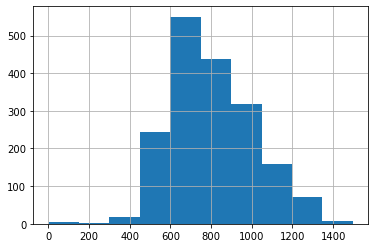

In [78]:
#No.of characters present in each sentence
#plotiing histogram for continous data
df2['Description'].str.len().hist()


The histogram shows that Description range from 200 to 1500 characters and generally, it is between 450 to 1360 characters.

In [79]:
#plotting number of words appearing in each description

<AxesSubplot:>

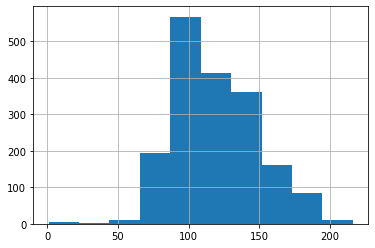

In [80]:
df2['Description'].str.split().map(lambda x : len(x)).hist()

It is clear that the number of words in the description ranges from 45 to 225 and mostly falls between 80 to 175 words.

<AxesSubplot:>

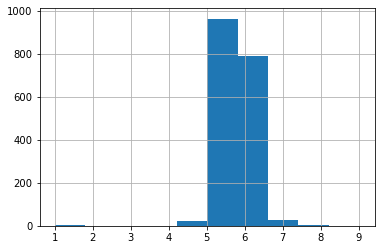

In [81]:


#Average word length in each sentence

df2['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The average word length ranges between 4.35 to 8.1 with 5 being the most common length

In [82]:


#fiding stowords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Kapoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
#creating a corpus
corpus = []
des = df2['Description'].str.split()
des = des.values.tolist()

In [84]:
des

[['Celebrating',
  '40',
  'years',
  'in',
  'business!',
  'Established',
  'in',
  '1976,',
  'we',
  'have',
  'been',
  'providing',
  'an',
  'exceptional',
  'level',
  'of',
  'service',
  'to',
  'the',
  'industry',
  'and',
  'commercial',
  'premises.',
  'We',
  'offer',
  'a',
  'wide',
  'selection',
  'of',
  'electrical',
  'services',
  'including:',
  '~',
  '\x95',
  'New',
  'Electrical',
  'Installations/Rewires',
  '\x95',
  'NICEIC',
  'test',
  '&',
  'inspection',
  '\x95',
  'Up-grading',
  'existing',
  'systems',
  '\x95',
  'Electrical',
  'Installation',
  'Condition',
  'Reports',
  '\x95',
  'Telecommunications',
  '\x95',
  'Portable',
  'Appliance',
  'Testing',
  '\x95',
  'Data',
  'cabling,',
  'fibre',
  '&',
  'networks',
  '\x95',
  'Fire',
  'alarms',
  '&',
  'Intruder',
  'Alarms',
  '\x95',
  'Warden',
  '&',
  'Nurse',
  'call',
  'systems',
  '\x95',
  'Emergency',
  'lighting,',
  'Design,',
  'Installation',
  '&',
  'Testing',
  '\x95',

In [85]:
corpus=[word for i in des for word in i]

In [86]:
corpus

['Celebrating',
 '40',
 'years',
 'in',
 'business!',
 'Established',
 'in',
 '1976,',
 'we',
 'have',
 'been',
 'providing',
 'an',
 'exceptional',
 'level',
 'of',
 'service',
 'to',
 'the',
 'industry',
 'and',
 'commercial',
 'premises.',
 'We',
 'offer',
 'a',
 'wide',
 'selection',
 'of',
 'electrical',
 'services',
 'including:',
 '~',
 '\x95',
 'New',
 'Electrical',
 'Installations/Rewires',
 '\x95',
 'NICEIC',
 'test',
 '&',
 'inspection',
 '\x95',
 'Up-grading',
 'existing',
 'systems',
 '\x95',
 'Electrical',
 'Installation',
 'Condition',
 'Reports',
 '\x95',
 'Telecommunications',
 '\x95',
 'Portable',
 'Appliance',
 'Testing',
 '\x95',
 'Data',
 'cabling,',
 'fibre',
 '&',
 'networks',
 '\x95',
 'Fire',
 'alarms',
 '&',
 'Intruder',
 'Alarms',
 '\x95',
 'Warden',
 '&',
 'Nurse',
 'call',
 'systems',
 '\x95',
 'Emergency',
 'lighting,',
 'Design,',
 'Installation',
 '&',
 'Testing',
 '\x95',
 'Access',
 '&',
 'door',
 'entry',
 '\x95',
 'Security',
 'lighting',
 '\x9d',
 '

<BarContainer object of 10 artists>

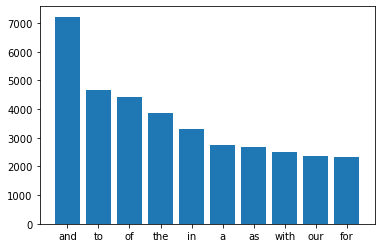

In [87]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]= dic[word] + 1
        
top= sorted(dic.items(),key = lambda x:x[1],reverse = True)[:10]
x,y=zip(*top)
plt.bar(x,y)

We can evidently see that stopwords such as “and”,” to” and “of” dominate in Description.

# Preprocessing the data

In [88]:
#Creating Meta Data using the following steps:-
#1.tokenize
#2.remove stopwords
#3.lemmatize
#4.convert to the bag of words


In [89]:
def preprocess_description(df2):
    Corpus = []
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for text in df2['Description']:
        words = [w for w in word_tokenize(text.lower()) if (w not in stop)]
        
        
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        Corpus.append(words)
    return Corpus


In [90]:
Corpus = preprocess_description(df2)

In [91]:
Corpus

[['celebrating',
  'year',
  'business',
  'established',
  '1976',
  'providing',
  'exceptional',
  'level',
  'service',
  'industry',
  'commercial',
  'premise',
  'offer',
  'wide',
  'selection',
  'electrical',
  'service',
  'including',
  'new',
  'electrical',
  'installations/rewires',
  'niceic',
  'test',
  'inspection',
  'up-grading',
  'existing',
  'system',
  'electrical',
  'installation',
  'condition',
  'report',
  'telecommunication',
  'portable',
  'appliance',
  'testing',
  'data',
  'cabling',
  'fibre',
  'network',
  'fire',
  'alarm',
  'intruder',
  'alarm',
  'warden',
  'nurse',
  'call',
  'system',
  'emergency',
  'lighting',
  'design',
  'installation',
  'testing',
  'access',
  'door',
  'entry',
  'security',
  'lighting',
  'complete',
  'design',
  'service',
  'maintenance'],
 ['high',
  'point',
  'construction',
  'well-established',
  'family',
  'run',
  'groundwork',
  'civil',
  'engineering',
  'structure',
  'business',
  'offering'

In [92]:
len(Corpus)

1808

In [93]:
meta = []
for i in range(len(Corpus)):
    str = ""
    for l in Corpus[i]:
        str+=l + ' '
    meta.append(str)
    


In [94]:
meta

['celebrating year business established 1976 providing exceptional level service industry commercial premise offer wide selection electrical service including new electrical installations/rewires niceic test inspection up-grading existing system electrical installation condition report telecommunication portable appliance testing data cabling fibre network fire alarm intruder alarm warden nurse call system emergency lighting design installation testing access door entry security lighting complete design service maintenance ',
 'high point construction well-established family run groundwork civil engineering structure business offering range service construction industry foundation success lie leveraging experience resource add value innovation value engineering approach allows reduce cost finding new way solving old problem every project take receives full attention member team regardless size scope high point construction limited place high importance flexibility originality dedicatio

In [95]:
Corpus_upd = [word for i in Corpus for word in i]

In [96]:
Corpus_upd

['celebrating',
 'year',
 'business',
 'established',
 '1976',
 'providing',
 'exceptional',
 'level',
 'service',
 'industry',
 'commercial',
 'premise',
 'offer',
 'wide',
 'selection',
 'electrical',
 'service',
 'including',
 'new',
 'electrical',
 'installations/rewires',
 'niceic',
 'test',
 'inspection',
 'up-grading',
 'existing',
 'system',
 'electrical',
 'installation',
 'condition',
 'report',
 'telecommunication',
 'portable',
 'appliance',
 'testing',
 'data',
 'cabling',
 'fibre',
 'network',
 'fire',
 'alarm',
 'intruder',
 'alarm',
 'warden',
 'nurse',
 'call',
 'system',
 'emergency',
 'lighting',
 'design',
 'installation',
 'testing',
 'access',
 'door',
 'entry',
 'security',
 'lighting',
 'complete',
 'design',
 'service',
 'maintenance',
 'high',
 'point',
 'construction',
 'well-established',
 'family',
 'run',
 'groundwork',
 'civil',
 'engineering',
 'structure',
 'business',
 'offering',
 'range',
 'service',
 'construction',
 'industry',
 'foundation',
 'suc

In [97]:
#creating bag of words
dic = gensim.corpora.Dictionary(Corpus)
bow_corpus =[dic.doc2bow(doc) for doc in Corpus]

    


In [98]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 3),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 3),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(4, 1),
  (8, 1),
  (12, 1),
  (23, 1),
  (32, 1),
  (42, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 2),
  (58, 1),
  (59, 1),
  (60, 3),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 3),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),

In [99]:
id_words = [[(dic[id], count) for id, count in line] for line in bow_corpus]




In [100]:
id_words


[[('1976', 1),
  ('access', 1),
  ('alarm', 2),
  ('appliance', 1),
  ('business', 1),
  ('cabling', 1),
  ('call', 1),
  ('celebrating', 1),
  ('commercial', 1),
  ('complete', 1),
  ('condition', 1),
  ('data', 1),
  ('design', 2),
  ('door', 1),
  ('electrical', 3),
  ('emergency', 1),
  ('entry', 1),
  ('established', 1),
  ('exceptional', 1),
  ('existing', 1),
  ('fibre', 1),
  ('fire', 1),
  ('including', 1),
  ('industry', 1),
  ('inspection', 1),
  ('installation', 2),
  ('installations/rewires', 1),
  ('intruder', 1),
  ('level', 1),
  ('lighting', 2),
  ('maintenance', 1),
  ('network', 1),
  ('new', 1),
  ('niceic', 1),
  ('nurse', 1),
  ('offer', 1),
  ('portable', 1),
  ('premise', 1),
  ('providing', 1),
  ('report', 1),
  ('security', 1),
  ('selection', 1),
  ('service', 3),
  ('system', 2),
  ('telecommunication', 1),
  ('test', 1),
  ('testing', 2),
  ('up-grading', 1),
  ('warden', 1),
  ('wide', 1),
  ('year', 1)],
 [('business', 1),
  ('commercial', 1),
  ('design

In [101]:
#performing topic Modelling using LDA(latent dirichlet allocation) which processes the unordered data
# we categorize our documents in topics so that we can dig into further data exploration for each topic or topic group.


In [102]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 5,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.018*"service" + 0.015*"project" + 0.012*"work" + 0.009*"commercial" + 0.008*"well" + 0.007*"building" + 0.007*"installation" + 0.007*"contractor" + 0.007*"electrical" + 0.006*"company"'),
 (1,
  '0.023*"service" + 0.011*"project" + 0.010*"work" + 0.009*"solution" + 0.009*"construction" + 0.008*"client" + 0.007*"customer" + 0.007*"ltd" + 0.007*"company" + 0.007*"contractor"'),
 (2,
  '0.009*"service" + 0.007*"work" + 0.006*"year" + 0.006*"project" + 0.005*"system" + 0.005*"well" + 0.005*"team" + 0.004*"construction" + 0.004*"home" + 0.004*"contractor"'),
 (3,
  '0.025*"fire" + 0.023*"system" + 0.020*"installation" + 0.017*"service" + 0.012*"alarm" + 0.011*"maintenance" + 0.010*"security" + 0.009*"electrical" + 0.008*"solution" + 0.008*"lighting"'),
 (4,
  '0.017*"service" + 0.013*"customer" + 0.013*"project" + 0.010*"client" + 0.008*"work" + 0.008*"quality" + 0.008*"company" + 0.008*"business" + 0.007*"construction" + 0.007*"team"')]

In [103]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.030974 -0.036413       1        1  41.769346
4     -0.092740 -0.022706       2        1  24.274085
0     -0.026834 -0.014833       3        1  20.980907
3      0.145305 -0.028697       4        1   8.646903
2      0.005243  0.102649       5        1   4.328759, topic_info=             Term        Freq       Total Category  logprob  loglift
43         system  808.000000  808.000000  Default  30.0000  30.0000
21           fire  378.000000  378.000000  Default  29.0000  29.0000
25   installation  819.000000  819.000000  Default  28.0000  28.0000
2           alarm  190.000000  190.000000  Default  27.0000  27.0000
40       security  278.000000  278.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
25   installation   16.501308  819.173479   Topic5  -5.8745  -0.7650
32            new   13.576658  380.606667   Topic5  -6.0696  -0.1935
70     experience   14.578204  585.673964   Topic5  -5.9985  -0.5533
30    maintenance   14.567019  634.019457   Topic5  -5.9992  -0.6334
285       quality   14.690892  798.395760   Topic5  -5.9908  -0.8555

[438 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
515       1  0.775694  14001
515       2  0.026295  14001
515       3  0.078884  14001
515       4  0.105179  14001
515       5  0.013147  14001
...     ...       ...    ...
50        2  0.304500   year
50        3  0.219356   year
50        4  0.053396   year
50        5  0.050510   year
491       3  0.911957    £50

[948 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 3 and topic 1 overlap  this indicates that the topics are more similar.

Also topic2 and topic 1 are quite similar as they are alomost touching each other.

On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 5 the most relevant words are service,project,system etc

# Applying the model

In [104]:
#applying content-based recommender system with tfid

tfidf_vectorizer = TfidfVectorizer()
tf_idf_des = tfidf_vectorizer.fit_transform(meta)


In [105]:

tff = pd.DataFrame(tf_idf_des.toarray())

In [106]:
tff.shape

(1808, 9355)

In [107]:
#using SVD to reduce the matrices to same row length to calculate cosine similarities.
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components= 96)
new_tff = SVD.fit_transform(tff)


In [108]:
new_tff.shape

(1808, 96)

In [109]:
tfidf_vectorizer = TfidfVectorizer()
tf_idf_work = tfidf_vectorizer.fit_transform(work_meta)


In [110]:
tf_idf_work_arr = pd.DataFrame(tf_idf_work.toarray())

In [111]:
tf_idf_work_arr.shape

(96, 181)

In [112]:
SVD = TruncatedSVD(n_components= 100)
new_work = SVD.fit_transform(tf_idf_work_arr)


In [113]:
new_work.shape

(96, 96)

In [114]:
#using cosine similarity to find out the similarity between the given text documents
from sklearn.metrics.pairwise import cosine_similarity
cos_similarity_tfidf = map(lambda x: cosine_similarity(tf_idf_work_arr,x),tff)

In [115]:

print(cos_similarity_tfidf)

In [116]:
new_tff

array([[ 0.2627097 ,  0.4290308 , -0.11349895, ...,  0.00146756,
        -0.04092768,  0.01669702],
       [ 0.25780053, -0.15382622,  0.04013426, ...,  0.04994145,
         0.02205909,  0.01702514],
       [ 0.10681621, -0.02268228,  0.03426436, ...,  0.00423105,
         0.02024818, -0.06376762],
       ...,
       [ 0.09766773, -0.03244729,  0.01381162, ..., -0.00982302,
        -0.01092248,  0.00499241],
       [ 0.20498982, -0.0315095 ,  0.09438581, ..., -0.02201688,
         0.02147877, -0.0184186 ],
       [ 0.16837777,  0.13820544, -0.01408316, ...,  0.01479836,
        -0.0179889 , -0.02123795]])

In [117]:
new_work

array([[ 2.14494587e-01, -4.07978413e-02, -2.71604767e-02, ...,
         1.66071268e-04,  2.64605072e-04, -5.70289371e-05],
       [ 1.87294718e-01, -1.25962179e-02, -3.59922859e-02, ...,
        -4.98131676e-04, -1.12852860e-04,  5.05699240e-05],
       [ 2.81957482e-01, -4.40664180e-03, -8.39083333e-02, ...,
         2.18699128e-03,  2.28960995e-03,  2.28171402e-05],
       ...,
       [ 6.31843515e-02,  1.93381811e-01,  2.30551293e-02, ...,
        -3.20181687e-03, -1.46098563e-03, -6.68854030e-04],
       [ 2.96974134e-02,  1.23038068e-01,  1.73606840e-01, ...,
        -1.23690150e-03,  4.57108355e-03, -8.22055641e-04],
       [ 5.02581428e-02,  4.10459098e-01, -2.60087091e-01, ...,
        -3.97596831e-03, -1.94464366e-03, -9.78101092e-05]])

In [118]:
tf_idf_work_arr.loc[:0]


0    1    2    3    4    5    6    7    8    9    ...  171  172  173  174  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   175  176  177  178  179  180  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 181 columns]

# Evaluating the model

In [119]:
def score_new(i):
    score = cosine_similarity(new_work,new_tff[i].reshape(1,-1)).reshape(-1)
    dct = {'CB_score':score}
    score_df = pd.DataFrame(dct,index= df1['WorkCatName'])
    
    return score_df
    

In [120]:
scored = score_new(5)

In [121]:
df_join = pd.merge(df1 , scored, on=["WorkCatName"])

In [122]:
df_join 

WorkCatID                                        WorkCatName  CB_score
0           0                  Building finishes > Doors > Doors  0.089632
1           1     Building finishes > Doors > Doors (fire proof)  0.018254
2           2      Building finishes > External walls > Cladding -0.097410
3           3     Building finishes > External walls > Rendering -0.099696
4           4  Building finishes > Flooring > Flooring (cemen...  0.176742
..        ...                                                ...       ...
91         91  Electrical > Power supply > Emergency lighting... -0.129172
92         92   Building general > Sector > Listed building work  0.332465
93         93  Other services > Security > Cctv installation ...  0.112110
94         94  Mechanical > Boilers > Gas-fired condensing bo... -0.030432
95         95                      Electrical > Lighting systems -0.022446

[96 rows x 3 columns]

In [123]:
df_join = df_join[df_join['CB_score']>0.2]

In [124]:
#The table shows the CB_Score(For content-based model) greater then 0.2, obtained after calculating the cosine similarity.
df_join 



WorkCatID                                        WorkCatName  CB_score
5           5  Building finishes > Flooring > Flooring (general)  0.263877
22         22  Building general > Building type > Brick and b...  0.232781
23         23  Building general > Building type > Concrete (i...  0.249749
24         24      Building general > Building type > Demolition  0.325592
25         25     Building general > Building type > Scaffolding  0.435977
26         26  Building general > Building type > Site clearance  0.398652
27         27  Building general > Building type > Structural ...  0.414738
28         28   Building general > Building (design & construct)  0.248946
29         29                Building general > Building general  0.549514
30         30  Building general > Building refurbishment over...  0.346981
33         33  Building general > Management contracting (gen...  0.230448
34         34   Building general > Sector > Building (hospitals)  0.405311
35         35  Building general > Sector > Building (industrial)  0.394841
36         36     Building general > Sector > Building (offices)  0.425730
37         37  Building general > Sector > Building (private ...  0.399970
39         39  Building general > Sector > Building (social h...  0.380940
40         40  Building general > Sector > Building (sports &...  0.412637
62         62  Electrical > Electrical installation & mainten...  0.242876
73         73  Mechanical > Building service equipment > Buil...  0.221411
85         85  Other services > Building services > Building ...  0.310375
86         86  Other services > General maintenance > Buildin...  0.290384
87         87  Building general > Building type > Masonry and...  0.217449
92         92   Building general > Sector > Listed building work  0.332465

In [125]:
y_pred = df_join['WorkCatID']

In [62]:
y_pred

5      5
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
73    73
85    85
86    86
87    87
88    88
92    92
Name: WorkCatID, dtype: int64

In [63]:
def y_true_val(i):
    y_true = df2['TargetWorkCatergoryIDs'][i] 
    return y_true
    

In [64]:
y_true = y_true_val(5)

In [65]:
y_true= y_true[1:-1].split(",")
for i in range(len(y_true)):
    y_true[i]=int(y_true[i])

print(y_true)


[8, 18, 38, 39, 84, 86]


In [66]:
def common_element(y_pred, y_true):
    result = [i for i in y_pred if i in y_true]
    if len(result) > 1:
        print('The model is fairly able to recommend for the given description')
    else:
        print("The model is not able to provide a fair recommendation for the given description")
            
    return result
 

 



print("The common WorkCatId's in the two lists are :" , common_element(y_pred, y_true))


The model is fairly able to recommend for the given description
The common WorkCatId's in the two lists are : [38, 39, 86]


# Q1 Limitations found in the task.

1. The description given by the companies might not be completely precise according to their domain of the work, due to which the model fails to recommend the right target category work ids for them.
2. The model gives suggestions based on the currently available description by the company which is limited and there isn't anything unexpected to reveal.
3. The sklearn accuracy score, precision and f1 score don't work for different lengths of arrays due to which this method could not be used for evaluation.


# Q2 Improvement
1. The approach to improve this point is to study more about the company's background to verify that its mission and vision align with the description provided by them.
2. With more time, we can explore new types of content-based filtering models and also even other new state-of-the-art models that would work well for the given data.
3. With more time available, we can explore ways to find a proper accuracy metric for the different array lengths and provide a better evaluation metric.